 #-------------ML 2° APPROACHES------------

##import data

In [ ]:
# Step 1: Monta Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Importa le librerie necessarie
import pandas as pd

# Step 3: Specifica il percorso del file .dta


file_path='/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/dt_completo_04_11_2024_secondo_terzo.csv'# 100K MA CON TARGET DOWNSMAPLING 0:89% E 1:11%
#file_path='/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/dt_completo_04_11_2024_secondo_terzo_DOWNSAMPLING_16000.csv'
#file_path='/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/dt_completo_04_11_2024_secondo_terzo_PROPORTIONAL_20000.csv'


# Step 4: Carica il file .dta in un DataFrame
df = pd.read_csv(file_path)

# Step 5: Visualizza le prime righe del DataFrame per verificare l'importazione
df




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,codice,elixsum3,target,DIAGNOSI
0,A000000046193699,1.0,1,"Colostomy status; Fistula of intestine, exclud..."
1,A000000005695721,0.0,0,"Pressure ulcer, lower back; Other functional d..."
2,A000000009356867,2.0,1,Acute respiratory failure; Malignant neoplasm ...
3,A000000035364919,2.0,0,Malignant neoplasm of lateral wall of urinary ...
4,A000000044748792,2.0,0,Malignant neoplasm of prostate; Other pulmonar...
...,...,...,...,...
3456482,A000000047290338,2.0,0,Encounter for antineoplastic chemotherapy; Mal...
3456483,A000000020186108,2.0,0,Malignant neoplasm of ovary; Secondary and uns...
3456484,A000000066182524,0.0,0,Benign neoplasm of cranial nerves; Sensorineur...
3456485,A000000044631506,2.0,0,Malignant neoplasm of descending colon; Malign...


In [ ]:
df.columns

Index(['codice', 'elixsum3', 'target', 'DIAGNOSI'], dtype='object')

In [ ]:
# Rimuove le righe dove la colonna 'DIAGNOSI' ha valore NaN
df = df.dropna(subset=['elixsum3', 'target', 'DIAGNOSI'])


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

codice      0
elixsum3    0
target      0
DIAGNOSI    0
dtype: int64


#TUTTO IOL PREPROCESSING

In [ ]:

raw_text = df['DIAGNOSI']#nuova variabile row_yexy che e review
#voglio trasfomare la reviwe in delle features
y = df['target'].tolist()
raw_text[1]#stampo secondo esempio di row text ,righe partono da 0 indice

import nltk #libreria  linguistica di python
nltk.download('wordnet') #tassonomia della lingua inglese ,
nltk.download('stopwords')#parole che tendenialmente hanno poco significato -->lemmatization metodi per normalizzare le parole(alternativa syanding riduce le parole alla loro forma  base )
nltk.download('omw-1.4')# libreria accessoria



from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()#classe wordnet                      #' ^' ha la funzione di diverso
#macrotext normalization                      lettere '^\a-z' seleziona tutte le lettere minuscole(con davanti ^ seleziona tutto quello di diverso
#dalle lettere minuscole ) ,\s spazi \s+ spazi in piu  ,\d tutti i numeri
#regular expression :  -->sito regex 101 ,sito che permette di visualizzare nel testo il processo di regular expression
text = raw_text.str.lower().str.replace('[^\w\s\d]',' ', regex=True) # \d tiene anche i caratteri numerici  \w sia lettere che numeri
 #(fa un lavorio in piu della \d )
#variabile text uguale alla variabile raw_text lower_case (rendo-minuscole ) replace rimpiazzo caratteri con spazio ,regex=T funziona su replace
#stimao togiendo tutti i caratteri speciali
#.str. tratta come stringa elementi colonna ,per pandas era una serie ,applica tutti elementi come stringe
text = text.str.split()#split divide stringa su carattere particolare indicato tra apici ,di default è lo spazio,l'operazione indicata come tokenization
text = text.apply(lambda x: [lemmatizer.lemmatize(sent) for sent in x])#ladividiamo perche dobbiamo fare lemmazition ,portare le parole alla loro radice
#lemmatize funzione di lemmatization
for row in tqdm(text):#libreria tdqm rinominata tdqm ,in verita ha funzione che si chiama come la libreria tdqm ,la funzione crea barra
# di completamento della procedura for
    [row.remove(i) for i in row if len(i) < 2] ##elimino lettera prima dell apostrolfo utilizzo ciclo for ,rimuove il token se ha lunghezza minore di 2
# parentesi quadre e la list -comprension ,utile per ottimizzare l'implementazione codice , mettiamo la principale condizione di for
print(text[1])


#endgrams sono insieme di parole ,siccome ogni parola e una features ma a volte le parole hanno senso assieme esempio diamond da solo non ha senso con diamond_client
from gensim.models.phrases import Phrases #funzione che crea ideogrammi
from nltk.corpus import stopwords
connectors = stopwords.words('english')
#conteggia parole min_count se dopo x volte non consideriamo piu quella parola ,thresold soglia determina se le parole sono una dopo l'altra

#la riga sotto si addestra sul testo ,creiamo oggetto bigram oggeto phares,tramite questi parametri vede quali son le parole vicine che possono diverntare bigrammi
#accuracy e f1 le più importanti
bigram = Phrases(text, min_count=5, threshold=0.2, connector_words=connectors) #gensim 4 usare con python 3.10
#bigram = Phrases(text, min_count=5, threshold=0.2, common_terms=connectors) #gensim 3
bigrams = [bigram[item] for item in text]
#
print(bigrams[1])






ngram = Phrases(bigrams, min_count=5, threshold=0.2, connector_words=connectors) # gensim 4
#ngram = Phrases(bigrams, min_count=5, threshold=0.2, common_terms=connectors) # gensim 3
#ngram faccio bigrammi partendo dal testo gia fatto con gia i bigrammi e cea nuovi bigrammi  ,abbiamo creTO TRI-GRAMMI E QUADRI-GRAMMI
ngrams = [ngram[item] for item in bigrams]
print(ngrams[1])





from nltk.corpus import stopwords
#togliamo le stop word utilizzando quelle di nltk
stop = stopwords.words('english')
#extend unisce le due liste in una sola
#siamo interessati alla CORRISPODENZA TRA REVIEW GIA SAPUTE CON QUELLE CHE PREDICIAMO
#print(ngrams[0])
train_sentences = []
for row in ngrams:#per ogni riga ngrams
    train_sentences.append(' '.join([item for item in row if item not in stop]))#tengo la parola se non e nelle sop words
train_sentences[0]#torno ad una stringa ,perche la lista fa considerare ogni parola come colonna ,processo sbagliato


# [1,2,3] [4,5,6]
# append[[1,2,3] [4,5,6]]
# extend [1,2,3,4,5,6]


df['DIAGNOSI'] = train_sentences


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
100%|██████████| 3453571/3453571 [00:03<00:00, 998065.35it/s] 


['pressure', 'ulcer', 'lower', 'back', 'other', 'functional', 'disorder', 'of', 'intestine', 'other', 'anomaly', 'of', 'intestine']
['pressure_ulcer', 'lower_back', 'other', 'functional_disorder', 'of', 'intestine', 'other', 'anomaly', 'of', 'intestine']
['pressure_ulcer_lower_back', 'other', 'functional_disorder_of_intestine', 'other', 'anomaly_of_intestine']


<ipython-input-5-5ad2ee07341e>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DIAGNOSI'] = train_sentences


## prepare BoW-->consumes more RAM

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer #sklearn libreria importiamo countvectorizer crea bag of word ,un vettore cin conteggio
#
vectorizer = CountVectorizer(ngram_range=(1, 1), max_features=500,binary=False)# binary=F false ,prendi 1000 parole
#al massimo le sceglie con count vectorizer prende parole piu frequenti e con tfidfvectorizer prende parole slezionate con piu alti punteggi
# vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=1000)
X = vectorizer.fit_transform(train_sentences)#fit_transform addestro train e validation assieme
#fit asegna ad ogni parola un token ,transform trasforma le frasi per quanto e lungo il vettore dei documenti
feature_names = vectorizer.get_feature_names_out()#salvo le mie features in un vettore lista
X = X.toarray()#trasformo in array
X = np.array(X)#trasformo in np.array
y = np.array(y)
X[1]#matrice di features ,frase trasformata in attributi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### create train/test split

In [ ]:
from sklearn.model_selection import train_test_split

# Primo split: 70% per il training, 30% per il test + validation
x_train, x_temp, y_train, y_temp = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Secondo split: 33% dei dati rimanenti per il test e 67% per la validation (così che la validazione sia il 10% complessivo)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, stratify=y_temp, test_size=2/3, random_state=42)

# Verifica le dimensioni degli split
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


x_train shape: (2417499, 500), y_train shape: (2417499,)
x_val shape: (345357, 500), y_val shape: (345357,)
x_test shape: (690715, 500), y_test shape: (690715,)


##1)BOW XGBOOST

In [ ]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 5.2 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# Nuovi iperparametri per XGBoost
best_params = {
    'colsample_bytree': 0.7513738362965748,
    'gamma': 0.06754112276884607,
    'learning_rate': 0.2525976541531967,
    'max_depth': 8,
    'min_child_weight': 3,
    'n_estimators': 151,
    'subsample': 0.792474950283967
}

# Creazione del modello XGBoost con i nuovi iperparametri
xgb_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')

# Adattamento del modello al training set
print("Adattamento del modello al training set...")
xgb_model.fit(x_train, y_train)



# Predizione sul set di test
y_test_pred = xgb_model.predict(x_test)

print("\nClassification Report sul set di test:")
print(classification_report(y_test, y_test_pred))


# Predizione sul set di validazione
y_val_pred = xgb_model.predict(x_val)
# Calcolo delle metriche di valutazione sui set di validazione e test
print("\nClassification Report sul set di validazione:")
print(classification_report(y_val, y_val_pred))




Adattamento del modello al training set...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:42:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report sul set di test:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    657036
           1       0.73      0.32      0.44     33679

    accuracy                           0.96    690715
   macro avg       0.85      0.66      0.71    690715
weighted avg       0.95      0.96      0.95    690715


Classification Report sul set di validazione:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    328517
           1       0.71      0.31      0.43     16840

    accuracy                           0.96    345357
   macro avg       0.84      0.65      0.71    345357
weighted avg       0.95      0.96      0.95    345357



In [ ]:
df['POST_RIOR_BOW'] = xgb_model.predict_proba(X)[:, 1]  # Probabilità della classe 1
df

<ipython-input-10-23dc1864a311>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POST_RIOR_BOW'] = xgb_model.predict_proba(X)[:, 1]  # Probabilità della classe 1


,codice,elixsum3,target,DIAGNOSI,POST_RIOR_BOW
0,A000000046193699,1.0,1,colostomy_status fistula_of_intestine_excludin...,0.199321
1,A000000005695721,0.0,0,pressure_ulcer_lower_back functional_disorder_...,0.013040
2,A000000009356867,2.0,1,acute_respiratory_failure malignant neoplasm l...,0.410669
3,A000000035364919,2.0,0,malignant neoplasm lateral_wall_of_urinary bla...,0.011348
4,A000000044748792,2.0,0,malignant neoplasm prostate pulmonary_embolism...,0.019866
...,...,...,...,...,...
3456482,A000000047290338,2.0,0,encounter_for_antineoplastic_chemotherapy mali...,0.009255
3456483,A000000020186108,2.0,0,malignant neoplasm ovary secondary unspecified...,0.010823
3456484,A000000066182524,0.0,0,benign neoplasm cranial_nerve_sensorineural_he...,0.005109
3456485,A000000044631506,2.0,0,malignant neoplasm descending_colon malignant ...,0.142735


###learning curves

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:42:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:42:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:43:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:43:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

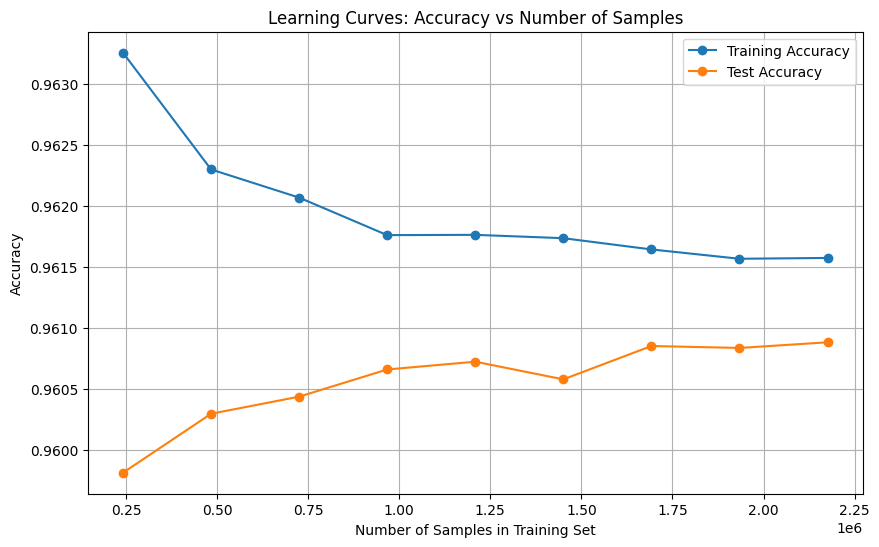

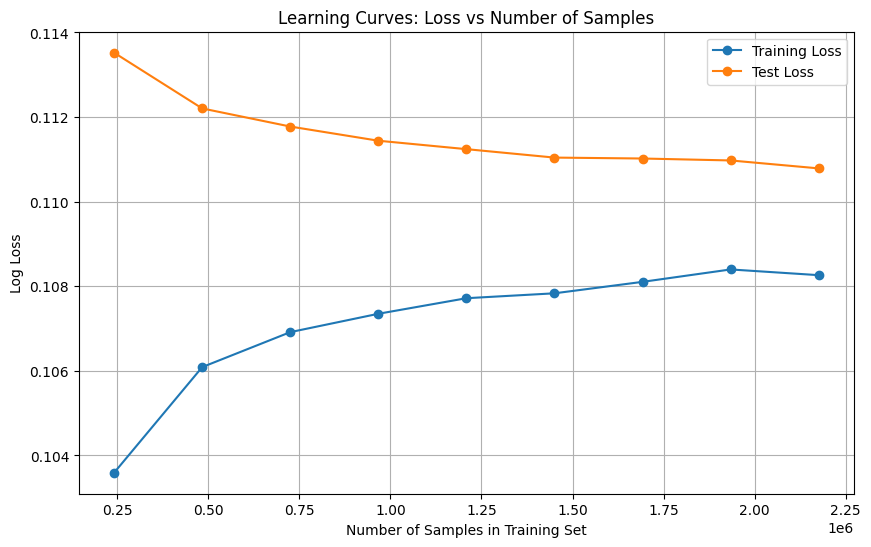

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, log_loss
from xgboost import XGBClassifier





# Array per memorizzare le metriche
train_sizes = np.linspace(0.1, 0.9, 9)  # Percentuali del training set
num_samples = (train_sizes * len(x_train)).astype(int)
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

# Calcolo delle learning curves
for size in train_sizes:
    X_train_partial, _, y_train_partial, _ = train_test_split(
        x_train, y_train, train_size=size, random_state=42, stratify=y_train
    )

    # Adattamento del modello
    xgb_model.fit(X_train_partial, y_train_partial)

    # Accuratezza sul training set
    train_pred = xgb_model.predict(X_train_partial)
    train_accuracies.append(accuracy_score(y_train_partial, train_pred))

    # Accuratezza sul test set
    test_pred = xgb_model.predict(x_test)
    test_accuracies.append(accuracy_score(y_test, test_pred))

    # Loss sul training set
    train_proba = xgb_model.predict_proba(X_train_partial)
    train_losses.append(log_loss(y_train_partial, train_proba))

    # Loss sul test set
    test_proba = xgb_model.predict_proba(x_test)
    test_losses.append(log_loss(y_test, test_proba))

# Plot delle learning curves (accuracy)
plt.figure(figsize=(10, 6))
plt.plot(num_samples, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(num_samples, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Learning Curves: Accuracy vs Number of Samples')
plt.xlabel('Number of Samples in Training Set')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Percorso dove salvare il file
save_path = "/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/2"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Salvataggio del grafico
plt.savefig(os.path.join(save_path, 'learning_curves_accuracy_BOW.png'))

plt.show()

# Plot delle learning curves (loss)
plt.figure(figsize=(10, 6))
plt.plot(num_samples, train_losses, label='Training Loss', marker='o')
plt.plot(num_samples, test_losses, label='Test Loss', marker='o')
plt.title('Learning Curves: Loss vs Number of Samples')
plt.xlabel('Number of Samples in Training Set')
plt.ylabel('Log Loss')
plt.legend()
plt.grid()

# Salvataggio del grafico
plt.savefig(os.path.join(save_path, 'learning_curves_loss_BOW.png'))

plt.show()

##CONFUAION MATRIX

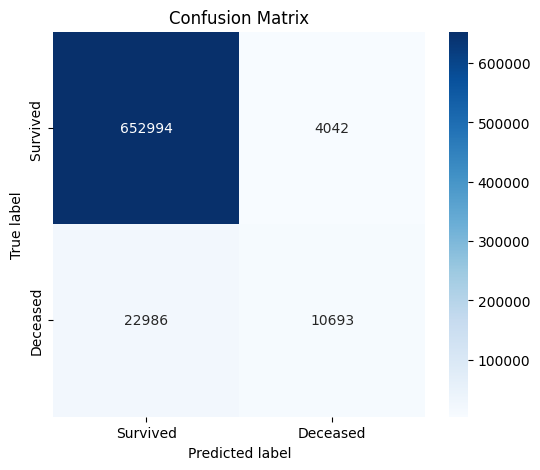

In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from xgboost import XGBClassifier
import numpy as np

# Calcolo della Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Visualizzazione della Confusion Matrix con Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Survived', 'Deceased'], yticklabels=['Survived ', 'Deceased'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Percorso dove salvare il file
save_path = "/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/2"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Salvataggio del grafico
plt.savefig(os.path.join(save_path, 'confusion_matrix_BOW.png'))

plt.show()

##ROC

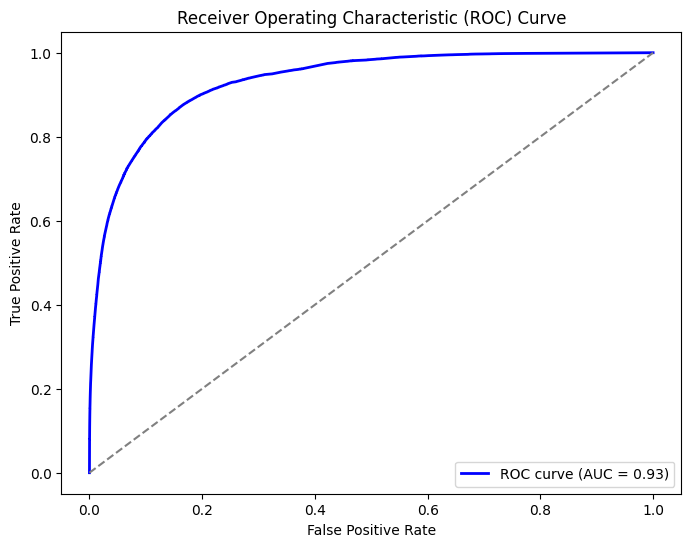

In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcola le probabilità previste per ogni classe
y_pred_prob = xgb_model.predict_proba(x_test)

# Calcola la curva ROC per la classe positiva (Classe 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Traccia la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linea diagonale (caso casuale)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Percorso dove salvare il file
save_path = "/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/2"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Salvataggio del grafico
plt.savefig(os.path.join(save_path, 'roc_curve_BOW.png'))

plt.show()

## CURVE PRECISONE E RECALL

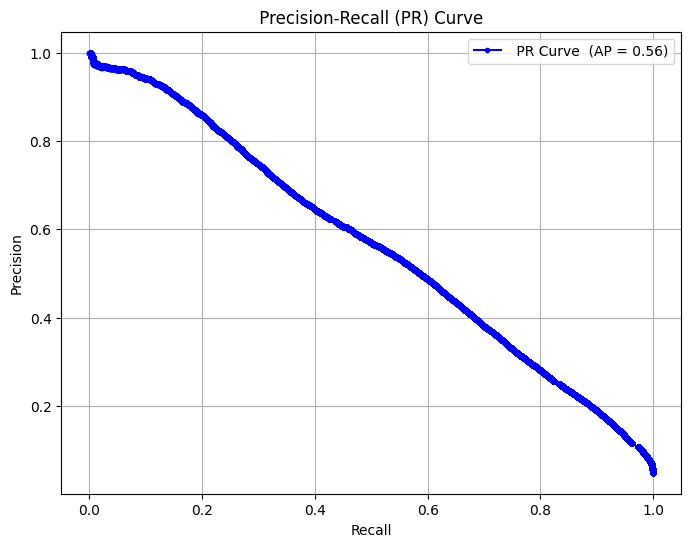

In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, classification_report, average_precision_score
from xgboost import XGBClassifier
import numpy as np

# Ottieni le probabilità predette per ogni classe
y_prob = xgb_model.predict_proba(x_test)[:, 1]  # Probabilità per la classe 1 (positivo)

# Calcola precisione, recall e Average Precision (AP)
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot delle curve Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='b', label=f' PR Curve  (AP = {average_precision:.2f})')
plt.title(' Precision-Recall (PR) Curve ')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()

# Percorso dove salvare il file
save_path = "/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/2"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Salvataggio del grafico
plt.savefig(os.path.join(save_path, 'precision_recall_curve_BOW.png'))

plt.show()

###grafico thresold vs metrics

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:50:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


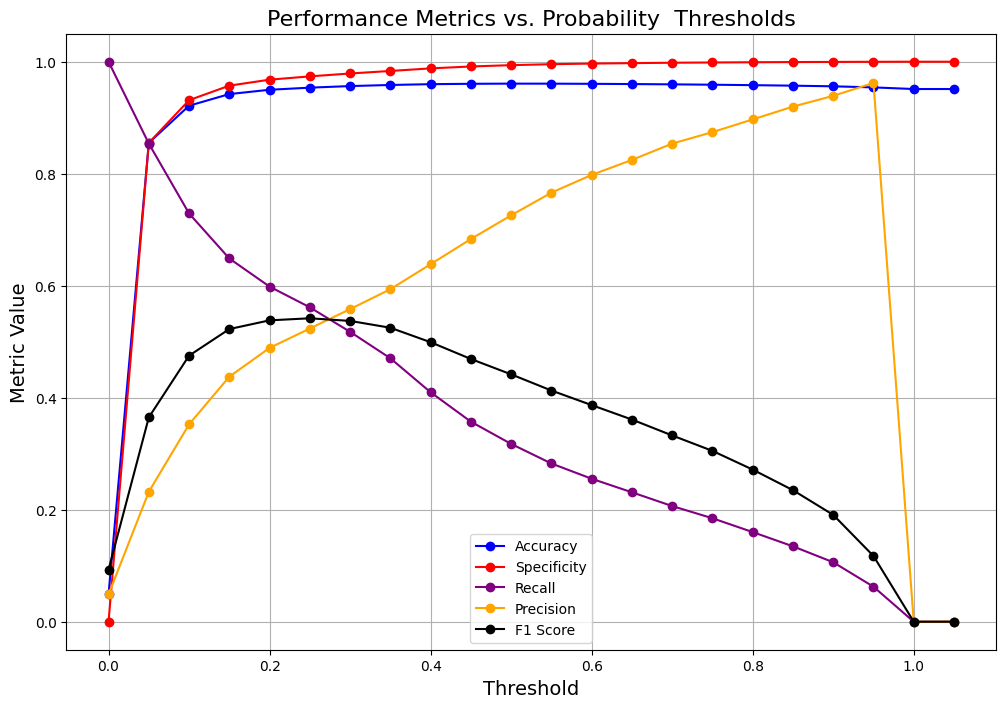

Threshold ottimale in base all'accuracy: 0.5


In [ ]:
import os
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Parametri forniti
best_params = {
    'colsample_bytree': 0.7513738362965748,
    'gamma': 0.06754112276884607,
    'learning_rate': 0.2525976541531967,
    'max_depth': 8,
    'min_child_weight': 3,
    'n_estimators': 151,
    'subsample': 0.792474950283967
}

# Creazione del modello XGBoost
xgb_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')

# Adattamento del modello al training set
xgb_model.fit(x_train, y_train)

# Predizione delle probabilità sul test set (probabilità di classe 1)
y_probs = xgb_model.predict_proba(x_test)[:, 1]  # Probabilità per la classe positiva (1)

# Funzione per calcolare e tracciare le metriche
def calculate_metrics_at_thresholds(y_true, probabilities):
    thresholds = np.arange(0.0, 1.1, 0.05)  # Varie soglie da 0 a 1
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    specificities = []

    for threshold in thresholds:
        # Crea le etichette predette basate sulla soglia
        y_pred = (probabilities >= threshold).astype(int)

        # Calcola la matrice di confusione
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

        # Calcola le metriche
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        specificity = tn / (tn + fp)  # Recall negativo

        # Aggiungi i valori delle metriche
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        specificities.append(specificity)

    return thresholds, accuracies, precisions, recalls, f1s, specificities

# Calcola le metriche per ogni threshold
thresholds, accuracies, precisions, recalls, f1s, specificities = calculate_metrics_at_thresholds(y_test, y_probs)

# Plot delle curve
plt.figure(figsize=(12, 8))

plt.plot(thresholds, accuracies, label="Accuracy", color='blue', marker='o')
plt.plot(thresholds, specificities, label="Specificity", color='red', marker='o')
plt.plot(thresholds, recalls, label="Recall", color='purple', marker='o')
plt.plot(thresholds, precisions, label="Precision", color='orange', marker='o')
plt.plot(thresholds, f1s, label="F1 Score", color='black', marker='o')

plt.title("Performance Metrics vs. Probability  Thresholds", fontsize=16)
plt.xlabel("Threshold", fontsize=14)
plt.ylabel("Metric Value", fontsize=14)
plt.legend(loc="best")
plt.grid(True)

# Percorso dove salvare il file
save_path = "/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/2"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Salvataggio del grafico
plt.savefig(os.path.join(save_path, 'metrics_vs_thresholds_BOW.png'))

plt.show()

# Determina il threshold ottimale in base all'accuracy
optimal_threshold = thresholds[np.argmax(accuracies)]
print(f"Threshold ottimale in base all'accuracy: {optimal_threshold}")

In [ ]:
# Determina il threshold ottimale in base all'accuracy
optimal_threshold = thresholds[np.argmax(f1s)]
print(f"Threshold ottimale in base al F1SCORE: {optimal_threshold}")

Threshold ottimale in base al F1SCORE: 0.25


# THRESOLD SU VALIDATION DT

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import numpy as np

# Nuovi iperparametri per XGBoost
best_params = {
    'colsample_bytree': 0.7513738362965748,
    'gamma': 0.06754112276884607,
    'learning_rate': 0.2525976541531967,
    'max_depth': 8,
    'min_child_weight': 3,
    'n_estimators': 151,
    'subsample': 0.792474950283967
}

# Creazione del modello XGBoost con i nuovi iperparametri
xgb_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')

# Adattamento del modello al training set
print("Adattamento del modello al training set...")
xgb_model.fit(x_train, y_train)

# Probabilità posteriori sul set di validazione
y_val_proba = xgb_model.predict_proba(x_val)[:, 1]


# Soglia arbitraria per classificare i soggetti
threshold = 0.25 # Modifica questa soglia per personalizzare la classificazione
y_val_pred_custom = (y_val_proba >= threshold).astype(int)

# Calcolo delle metriche di classificazione
print(f"\nClassification Report sul set di validazione con soglia {threshold}:")
print(classification_report(y_val, y_val_pred_custom))


# Calcolo della sensitivity e specificity
cm = confusion_matrix(y_val, y_val_pred_custom)
true_negative, false_positive, false_negative, true_positive = cm.ravel()
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("\nSensitivity (Recall per la classe positiva):", round(sensitivity, 4))
print("Specificity (Recall per la classe negativa):", round(specificity, 4))


Adattamento del modello al training set...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:52:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report sul set di validazione con soglia 0.25:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98    328517
           1       0.52      0.56      0.54     16840

    accuracy                           0.95    345357
   macro avg       0.75      0.76      0.76    345357
weighted avg       0.95      0.95      0.95    345357


Sensitivity (Recall per la classe positiva): 0.5554
Specificity (Recall per la classe negativa): 0.974


##2)tfidf rf

In [ ]:
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Assicurati che il lemmatizzatore e le stopwords siano scaricate
nltk.download('stopwords')
nltk.download('wordnet')

# 1. Funzione di preprocessing
def preprocess(text):
    # Converti in minuscolo
    text = text.lower()

    # Rimuovi caratteri speciali, numeri e punteggiatura
    text = re.sub(r'\W', ' ', text)

    # Rimuovi i numeri
    text = re.sub(r'\d+', ' ', text)

    # Rimuovi spazi extra
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenizzazione: separa le parole
    words = text.split()

    # Rimuovi le stopwords
    stop_words = set(stopwords.words('english'))  # Usa 'italian' se il tuo testo è in italiano
    words = [word for word in words if word not in stop_words]

    # Lemmatizzazione: riduci le parole alle loro radici
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Ricostruisci il testo pulito
    return ' '.join(words)

# Applica la pulizia a ogni frase
df['cleaned_DIAGNOSI'] = df['DIAGNOSI'].apply(preprocess)

# 2. Creazione del modello TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=500, ngram_range=(1, 2), binary=False)
X = tfidf_vectorizer.fit_transform(df['cleaned_DIAGNOSI'])

# 3. Divisione in Train (70%), Test (20%) e Validation (10%)
y = df['target']  # Assumendo 'target' sia la variabile target

# Prima dividiamo il dataset in train (70%) e resto (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Poi dividiamo il resto in test (20%) e validation (10%)
X_test, X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, test_size=2/3, stratify=y_temp, random_state=42)

# 4. Parametri definiti direttamente (nuovi settaggi)
best_params = {
    'n_estimators': 100,
    'max_depth': 36,
    'min_samples_split': 20,
    'min_samples_leaf': 3
}

# 5. Creazione del modello Random Forest con i nuovi parametri
final_model = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                     max_depth=best_params['max_depth'],
                                     min_samples_split=best_params['min_samples_split'],
                                     min_samples_leaf=best_params['min_samples_leaf'],
                                     random_state=42)

# 6. Addestramento del modello
final_model.fit(X_train, y_train)

# 7. Calcolare le probabilità a posteriori della classe 1
#y_pred_proba = final_model.predict_proba(X_validation)[:, 1]  # Estrai la probabilità per la classe 1

# 8. Aggiungere le probabilità nel DataFrame originale come nuova colonna con il nome 'POST_RIOR_TFIDF'
df['POST_RIOR_TFIDF'] = final_model.predict_proba(X)[:, 1]  # Estrai la probabilità per la classe 1 dal dataset intero



# 10. Valutazione finale del modello
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred))












[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-21-2834cc133f11>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_DIAGNOSI'] = df['DIAGNOSI'].apply(preprocess)
<ipython-input-21-2834cc133f11>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POST_RIOR_TFIDF'] = final_model.predict_proba(X)[:, 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    328517
           1       0.77      0.28      0.41     16840

    accuracy                           0.96    345357
   macro avg       0.87      0.64      0.70    345357
weighted avg       0.95      0.96      0.95    345357



In [ ]:
# 7. Calcolare le probabilità a posteriori della classe 1
y_pred_proba = final_model.predict_proba(X_validation)[:, 1]  # Estrai la probabilità per la classe 1

# 8. Aggiungere le probabilità nel DataFrame originale come nuova colonna con il nome 'POST_RIOR_TFIDF'
df['POST_RIOR_TFIDF'] = final_model.predict_proba(X)[:, 1]  # Estrai la probabilità per la classe 1 dal dataset intero

# 10. Valutazione finale del modello sul dataset di validazione
y_pred = final_model.predict(X_validation)
print(classification_report(y_validation, y_pred))

<ipython-input-22-7cd3f5e33ff0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POST_RIOR_TFIDF'] = final_model.predict_proba(X)[:, 1]  # Estrai la probabilità per la classe 1 dal dataset intero


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    657036
           1       0.78      0.29      0.42     33679

    accuracy                           0.96    690715
   macro avg       0.87      0.64      0.70    690715
weighted avg       0.96      0.96      0.95    690715



###learning curves

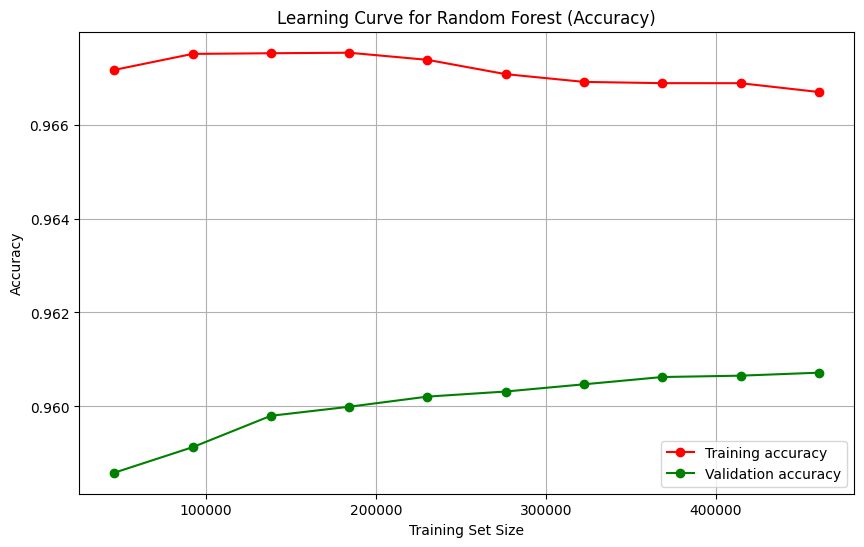

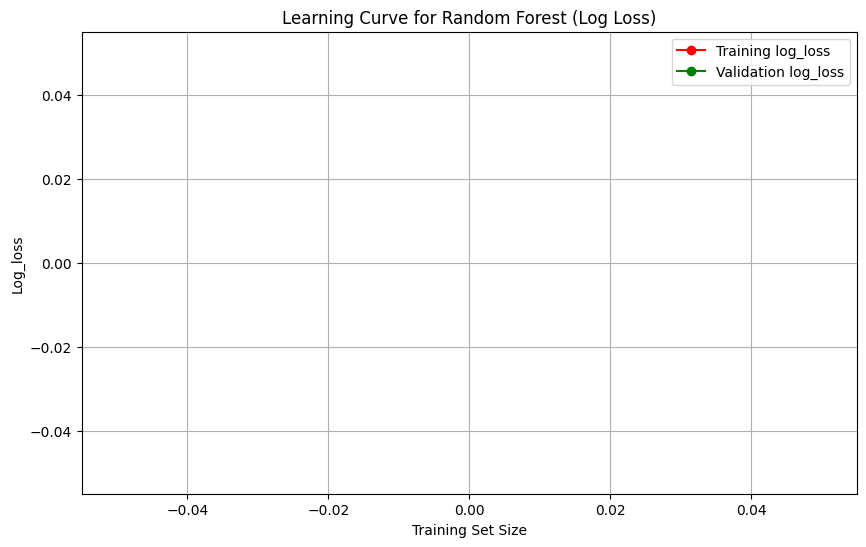

In [ ]:
import os
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss, make_scorer
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Funzione per calcolare e visualizzare le learning curve
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=3, scoring="accuracy", save_path=None, metric_name="accuracy"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel(metric_name.capitalize())

    # Plot delle learning curves
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label=f"Training {metric_name}")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label=f" Test {metric_name}")

    plt.legend(loc="best")
    plt.grid()

    if save_path:
        if not os.path.exists(save_path):
            os.makedirs(save_path)
        plt.savefig(os.path.join(save_path, f'learning_curve_{metric_name}_tfidf.png'))

    plt.show()

# Percorso dove salvare i file
save_path = "/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/2"


#Learning Curves: Accuracy vs Number of Samples
#Learning Curves: Loss vs Number of Samples



# Calcolo delle learning curve per il modello Random Forest (Accuracy)
plot_learning_curve(final_model, X_validation, y_validation, title="Learning Curves: Accuracy vs Number of Samples", cv=3, scoring="accuracy", save_path=save_path, metric_name="accuracy")

# Calcolo delle learning curve per il modello Random Forest (Log Loss)
plot_learning_curve(final_model, X_validation, y_validation, title="Learning Curves: Loss vs Number of Samples", cv=3, scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True), save_path=save_path, metric_name="log_loss")

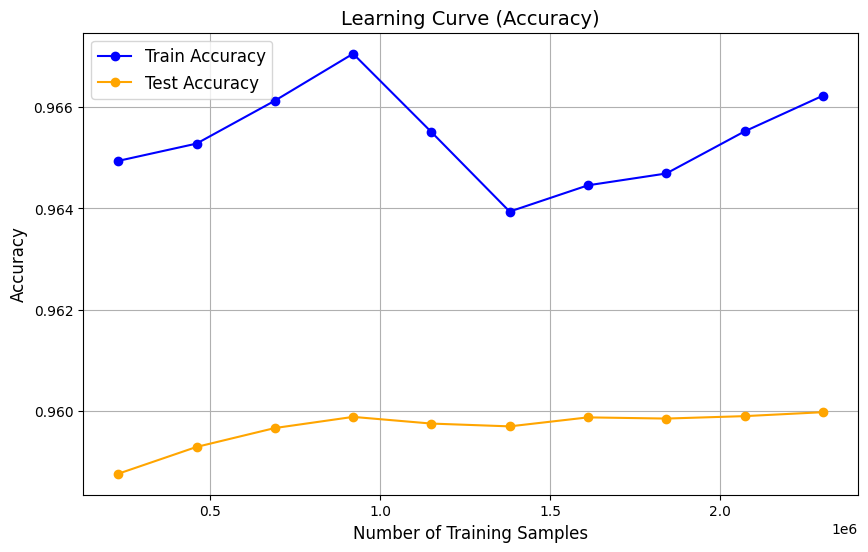

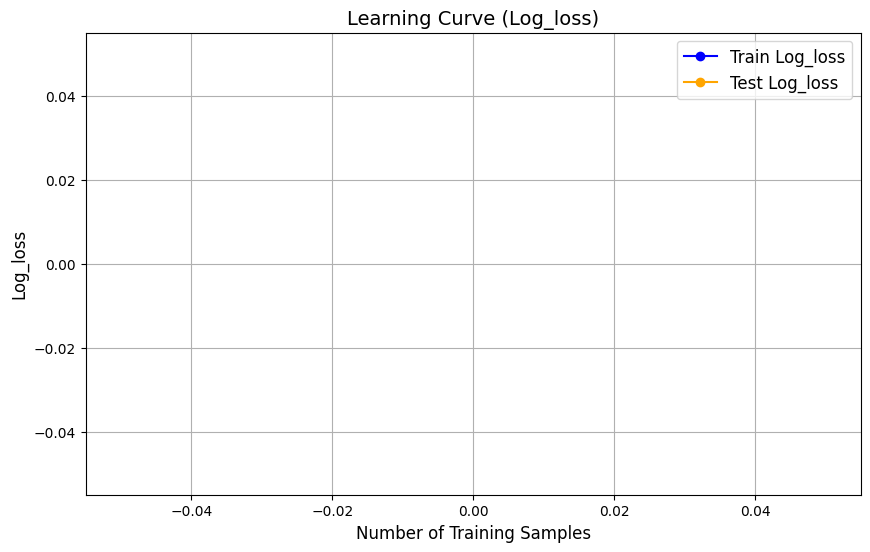

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import log_loss, make_scorer
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Funzione per calcolare e visualizzare le learning curve
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=3, scoring="accuracy", save_path=None, metric_name="accuracy"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label=f'Train {metric_name.capitalize()}', color='blue', marker='o')
    plt.plot(train_sizes, test_scores_mean, label=f'Test {metric_name.capitalize()}', color='orange', marker='o')
    plt.title(f'Learning Curve ({metric_name.capitalize()})', fontsize=14)
    plt.xlabel('Number of Training Samples', fontsize=12)
    plt.ylabel(metric_name.capitalize(), fontsize=12)
    plt.legend(fontsize=12)
    plt.grid()

    if save_path:
        if not os.path.exists(save_path):
            os.makedirs(save_path)
        plt.savefig(os.path.join(save_path, f'learning_curve_{metric_name}_rf.png'))

    plt.show()

# Percorso dove salvare i file
save_path = "/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/1"

# Calcolo delle learning curve per il modello Random Forest (Accuracy)
plot_learning_curve(final_model, X, y, title="Learning Curve  (Accuracy)", cv=3, scoring="accuracy", save_path=save_path, metric_name="accuracy")

# Calcolo delle learning curve per il modello Random Forest (Log Loss)
plot_learning_curve(final_model, X, y, title="Learning Curve  (Log Loss)", cv=3, scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True), save_path=save_path, metric_name="log_loss")

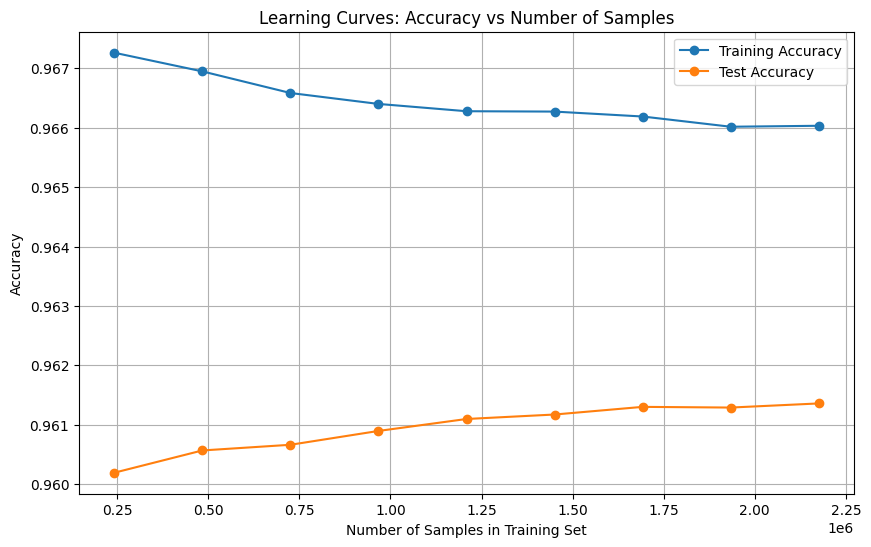

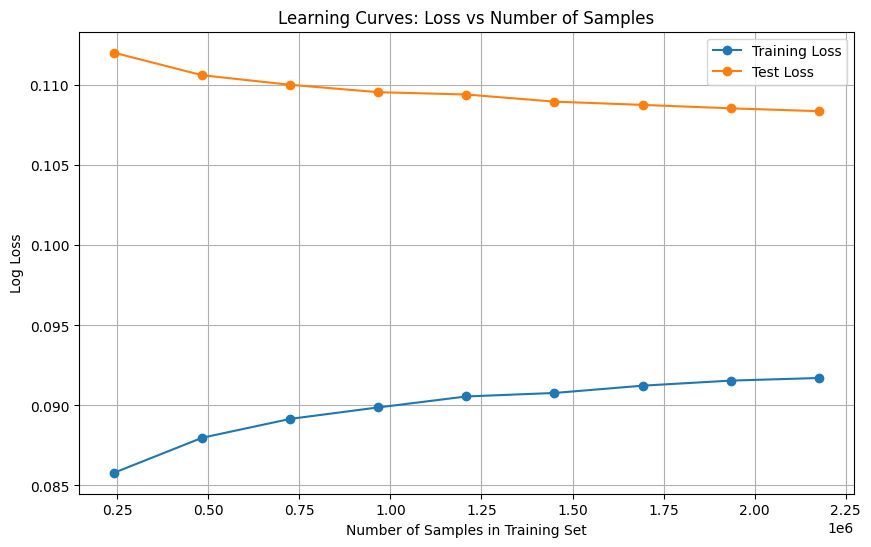

In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss

# Array per memorizzare le metriche
train_sizes = np.linspace(0.1, 0.9, 9)  # Percentuali del training set
num_samples = (train_sizes * X_train.shape[0]).astype(int)
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

# Calcolo delle learning curves
for size in train_sizes:
    X_train_partial, _, y_train_partial, _ = train_test_split(
        X_train, y_train, train_size=size, random_state=42, stratify=y_train
    )

    # Adattamento del modello
    final_model.fit(X_train_partial, y_train_partial)

    # Accuratezza sul training set
    train_pred = final_model.predict(X_train_partial)
    train_accuracies.append(accuracy_score(y_train_partial, train_pred))

    # Accuratezza sul test set
    test_pred = final_model.predict(X_validation)
    test_accuracies.append(accuracy_score(y_validation, test_pred))

    # Loss sul training set
    train_proba = final_model.predict_proba(X_train_partial)
    train_losses.append(log_loss(y_train_partial, train_proba))

    # Loss sul test set
    test_proba = final_model.predict_proba(X_validation)
    test_losses.append(log_loss(y_validation, test_proba))

# Plot delle learning curves (accuracy)
plt.figure(figsize=(10, 6))
plt.plot(num_samples, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(num_samples, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Learning Curves: Accuracy vs Number of Samples')
plt.xlabel('Number of Samples in Training Set')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Percorso dove salvare il file
save_path = "/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/2"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Salvataggio del grafico
plt.savefig(os.path.join(save_path, 'learning_curves_accuracy_RF_tfidf.png'))

plt.show()

# Plot delle learning curves (loss)
plt.figure(figsize=(10, 6))
plt.plot(num_samples, train_losses, label='Training Loss', marker='o')
plt.plot(num_samples, test_losses, label='Test Loss', marker='o')
plt.title('Learning Curves: Loss vs Number of Samples')
plt.xlabel('Number of Samples in Training Set')
plt.ylabel('Log Loss')
plt.legend()
plt.grid()

# Salvataggio del grafico
plt.savefig(os.path.join(save_path, 'learning_curves_loss_RF_tfidf.png'))

plt.show()

##CONFUSION MATRIX

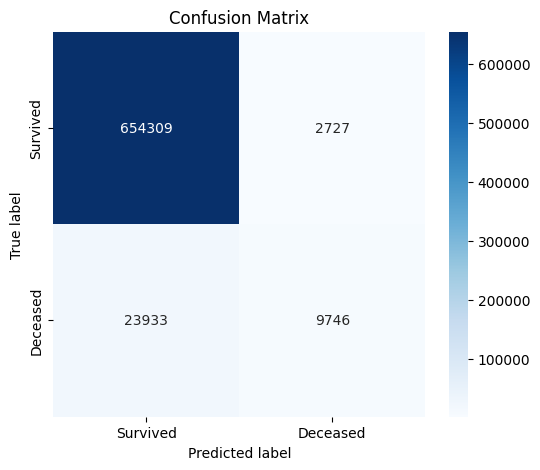

In [ ]:
# 7. Predizioni sul set di test
y_pred_test = final_model.predict(X_validation)

# 8. Calcola la matrice di confusione
cm = confusion_matrix(y_validation, y_pred_test)

# 9. Visualizzazione della matrice di confusione con Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Survived', 'Deceased'], yticklabels=['Survived', 'Deceased'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# 10. Percorso dove salvare il file
save_path = "/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/2"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# 11. Salvataggio del grafico
plt.savefig(os.path.join(save_path, 'confusion_matrix_tfidf.png'))
plt.show()


##ROC

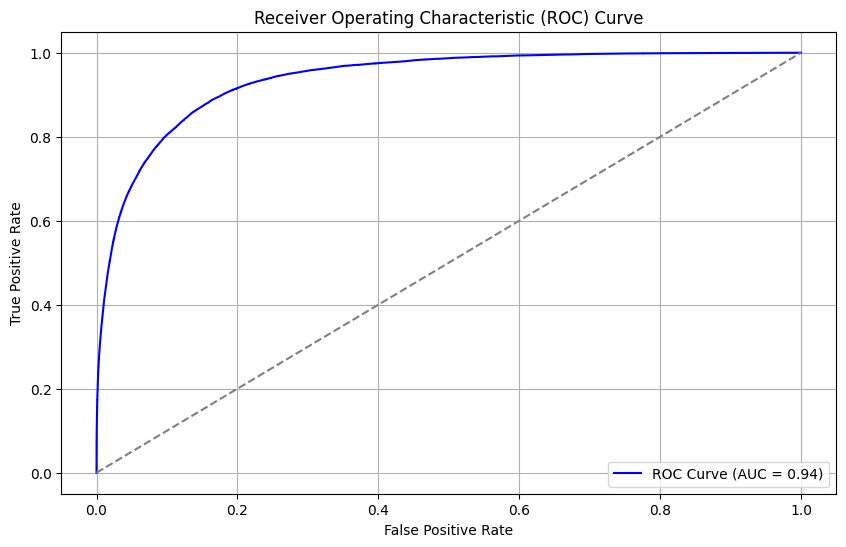

In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Calcolare le probabilità per la classe 1 sui dati di test
y_test_proba = final_model.predict_proba(X_validation)[:, 1]

# 2. Calcolare la curva ROC per il set di test
fpr_test, tpr_test, _ = roc_curve(y_validation, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# 3. Plot della curva ROC per il test set
plt.figure(figsize=(10, 6))
plt.plot(fpr_test, tpr_test, color='blue', label=f'ROC Curve (AUC = {roc_auc_test:.2f})')

# Linea diagonale (caso di classificazione casuale)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Percorso dove salvare i file
save_path = "/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/2"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Salvataggio del grafico della curva ROC
plt.savefig(os.path.join(save_path, 'roc_curve_test_rf_TFIDF.png'))
plt.show()


##CURVE PRECISION E RECALL

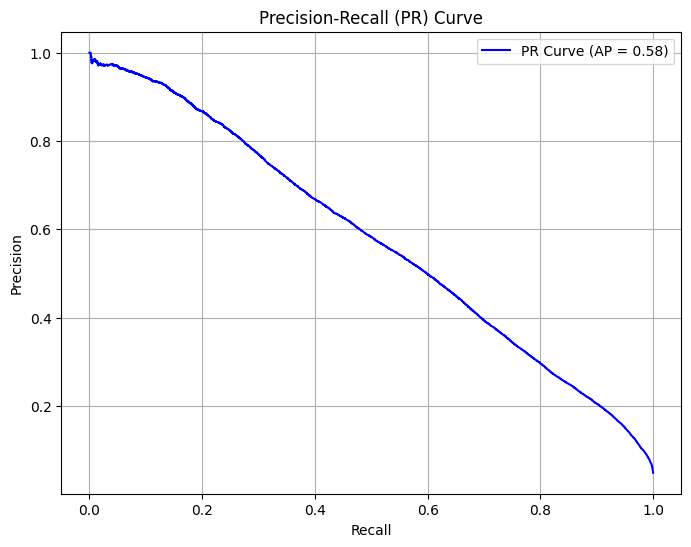

In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calcolo della precisione, del richiamo e dell'Average Precision (AP) per la classe positiva (1) sul test set
precision, recall, thresholds = precision_recall_curve(y_validation, y_test_proba)
average_precision = average_precision_score(y_validation, y_test_proba)

# Tracciamento della curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f'PR Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='best')
plt.grid(True)

# Definizione del percorso in cui salvare il file
save_path = "/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/2"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Salvataggio del grafico nella directory specificata
plt.savefig(os.path.join(save_path, 'precision_recall_curve_test_rf_tfidf.png'))

plt.show()


###grafico thresold vs metrics

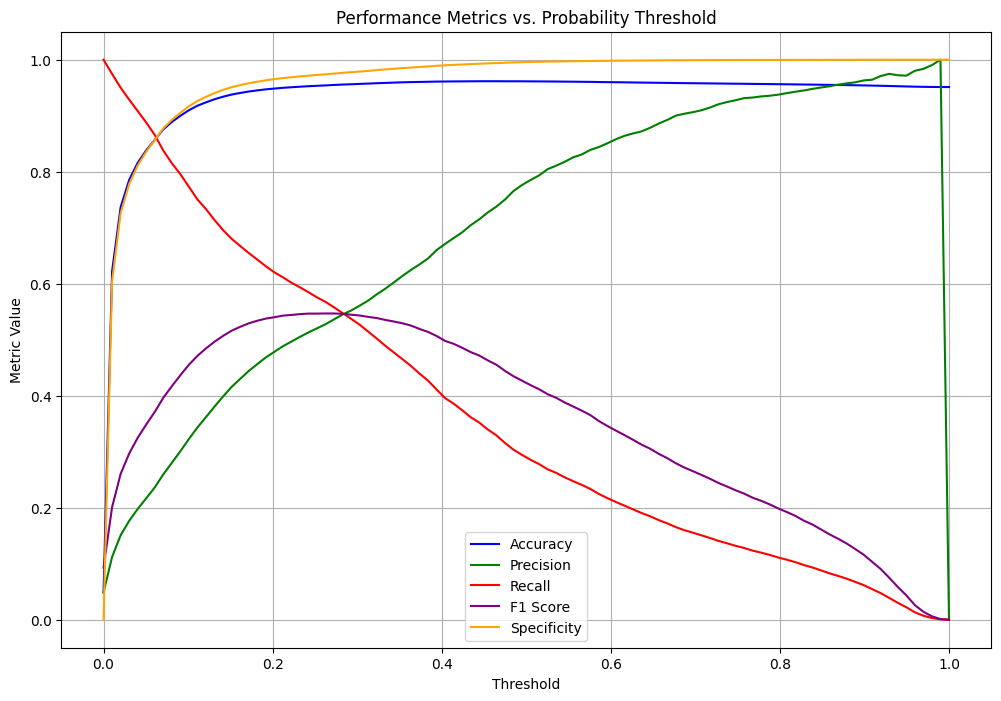

Threshold ottimale in base a F1 Score: 0.26262626262626265


In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc, confusion_matrix
import numpy as np

# 1. Calcolare le probabilità predette per il set di test
y_pred_proba_test = final_model.predict_proba(X_validation)[:, 1]  # Probabilità della classe 1

# 2. Definire un array di valori di threshold per il calcolo delle metriche
thresholds = np.linspace(0, 1, 100)

# 3. Calcolare le metriche per ogni valore di threshold
accuracies = []
precisions = []
recalls = []
f1_scores = []
specificities = []

for threshold in thresholds:
    # Calcolare le predizioni binarie in base al threshold
    y_pred_binary = (y_pred_proba_test >= threshold).astype(int)

    # Calcolare la confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_validation, y_pred_binary).ravel()

    # Calcolare le metriche
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    specificity = tn / (tn + fp) if tn + fp > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

    # Aggiungere i risultati alle liste
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    specificities.append(specificity)

# 4. Creare il grafico
plt.figure(figsize=(12, 8))

# Plot delle curve
plt.plot(thresholds, accuracies, label='Accuracy', color='blue')
plt.plot(thresholds, precisions, label='Precision', color='green')
plt.plot(thresholds, recalls, label='Recall', color='red')
plt.plot(thresholds, f1_scores, label='F1 Score', color='purple')
plt.plot(thresholds, specificities, label='Specificity', color='orange')

# Aggiungere etichette e titolo
plt.title('Performance Metrics vs. Probability Threshold')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.legend(loc='best')
plt.grid(True)

# Percorso dove salvare il file
save_path = "/content/drive/MyDrive/Colab Notebooks/PERCORSO_ELIXHAUSER/TESI ELIXHAUSER/risultati/2"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Salvataggio del grafico
plt.savefig(os.path.join(save_path, 'metrics_vs_threshold_rf_tfidf.png'))

# Mostrare il grafico
plt.show()

# 5. Determinare il threshold ottimale in base a una metrica (ad esempio, F1 Score)
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Threshold ottimale in base a F1 Score: {optimal_threshold}")

##THRESOLD SU VALIDATIOJN  

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

# Impostiamo il threshold arbitrario
threshold = 0.26  # Sostituisci con il valore di soglia che desideri

# Prediciamo le probabilità per il set di validation
y_pred_prob = final_model.predict_proba(X_test)[:, 1]  # Prendi la probabilità della classe 1

# Classificazione basata sul threshold
y_pred_class = (y_pred_prob >= threshold).astype(int)

# Calcoliamo le metriche di performance
accuracy = accuracy_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Sensitività (recall per la classe 1)
sensitivity = recall_score(y_test, y_pred_class, pos_label=1)

# Specificità (recall per la classe 0)
specificity = recall_score(y_test, y_pred_class, pos_label=0)

# Stampa i risultati
print(f"Threshold: {threshold}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall for Class 1): {sensitivity:.4f}")
print(f"Specificity (Recall for Class 0): {specificity:.4f}")

# Visualizza la matrice di confusione
print("\nConfusion Matrix:")
print(conf_matrix)

# Report di classificazione
print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))


Threshold: 0.26
Accuracy: 0.9536
Sensitivity (Recall for Class 1): 0.5647
Specificity (Recall for Class 0): 0.9736

Confusion Matrix:
[[319839   8678]
 [  7331   9509]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98    328517
           1       0.52      0.56      0.54     16840

    accuracy                           0.95    345357
   macro avg       0.75      0.77      0.76    345357
weighted avg       0.96      0.95      0.95    345357

